
## turn Islands into ordinal values?
## turn reef zone into ordinal


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import descartes
import seaborn as sns
import math 

In [5]:
df = pd.read_csv(r'C:\Users\harr1\Downloads\V0_BENT_LPI.csv')

C:\Users\harr1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
print (df.head(3))

   OBJECTID  ROUNDID MISSIONID          REGION_NAME ISLAND  SITEVISITID  \
1     82195       53   OES0512  Mariana Archipelago   Guam          740   
3     82193       53   OES0512  Mariana Archipelago   Guam          740   
4     82192       53   OES0512  Mariana Archipelago   Guam          740   

     SITE  LATITUDE  LONGITUDE REEF_ZONE       ...       Sarigan  Swains  Tau  \
1  GUA-01  13.43005  144.63748  Forereef       ...             0       0    0   
3  GUA-01  13.43005  144.63748  Forereef       ...             0       0    0   
4  GUA-01  13.43005  144.63748  Forereef       ...             0       0    0   

  Tinian  Tutuila  Wake Backreef  Forereef  Lagoon Protected Slope  
1      0        0     0        0         1       0               0  
3      0        0     0        0         1       0               0  
4      0        0     0        0         1       0               0  

[3 rows x 82 columns]


In [227]:
df.isna().sum()

OBJECTID                0
ROUNDID                 0
MISSIONID               0
REGION_NAME             0
ISLAND                  0
SITEVISITID             0
SITE                    0
LATITUDE               14
LONGITUDE              14
REEF_ZONE               0
DEPTH_BIN            4334
MIN_Z_M             19259
MAX_Z_M             19259
DATE_                   0
OBS_YEAR                0
LPITRANSECTRUN          0
DIVER                   0
MINDEPTH            48588
MAXDEPTH            46710
METHODCODE              0
CALIBRATION        130120
TRANNUM                 0
LPI_SEG                 0
BENTHICCODE             0
FAMILY             117112
GENUS              117112
CATEGORY_GENUS          0
BENTHICNAME             0
BENTHICCATEGORY         0
COMMON_NAME             0
COUNT                   0
dtype: int64

In [7]:
df = df.drop('MINDEPTH', axis=1)
df = df.drop('MAXDEPTH', axis=1)
df = df.drop('CALIBRATION', axis = 1)

In [8]:
df= df.dropna()

In [9]:
print(df.head())

   OBJECTID  ROUNDID MISSIONID          REGION_NAME ISLAND  SITEVISITID  \
1     82195       53   OES0512  Mariana Archipelago   Guam          740   
3     82193       53   OES0512  Mariana Archipelago   Guam          740   
4     82192       53   OES0512  Mariana Archipelago   Guam          740   
5     82197       53   OES0512  Mariana Archipelago   Guam          740   
8     82200       53   OES0512  Mariana Archipelago   Guam          740   

     SITE  LATITUDE  LONGITUDE REEF_ZONE  ...  TRANNUM  LPI_SEG  BENTHICCODE  \
1  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         MOSP   
3  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         ASSP   
4  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         ACSP   
5  GUA-01  13.43005  144.63748  Forereef  ...        1      NDR         POCS   
8  GUA-01  13.43005  144.63748  Forereef  ...        2      NDR         ASSP   

           FAMILY        GENUS  CATEGORY_GENUS     BENTHICNAME  \
1 

In [10]:
print ("# of families:", df['FAMILY'].nunique())
print ("Families:", df['FAMILY'].unique())
print ("Region names:", df['REGION_NAME'].unique())

# of families: 61
Families: ['Acroporidae' 'Pocilloporidae' 'Poritidae' 'Faviidae' 'Dictyotaceae'
 'Halimedaceae' 'Mussidae' 'Caulerpaceae' 'Alcyoniidae' 'Fungiidae'
 'Agariciidae' 'Cardiidae' 'Milleporidae' 'Sphenopidae' 'Siderastreidae'
 'Zoanthidae' 'Merulinidae' 'Siphonocladaceae' 'Valoniaceae'
 'Stylasteridae' 'Dendrophylliidae' 'Briareidae' 'Oculinidae'
 'Helioporidae' 'Corallinaceae' 'Pectiniidae' 'Caryophylliidae'
 'Astrocoeniidae' 'Anadyomenaceae' 'Bonnemaisoniaceae' 'Liagoraceae'
 'Rhodomelaceae' 'Ceramiaceae' 'Dasyaceae' 'Kallymeniaceae'
 'Dasycladaceae' 'Pseudanabaenaceae' 'Boodleaceae' 'Codiaceae'
 'Rhizophyllidaceae' 'Wrangeliaceae' 'Rhodymeniaceae' 'Dumontiaceae'
 'Delesseriaceae' 'Galaxauraceae' 'Peyssonneliaceae' 'Sargassaceae'
 'Nemastomataceae' 'Bryopsidaceae' 'Discosomatidae' 'Halymeniaceae'
 'Udoteaceae' 'Nephtheidae' 'Neogoniolithoideae' 'Cystocloniaceae'
 'Hapalidiaceae' 'Plocamiaceae' 'Stichodactylidae' 'Rhodogorgonaceae'
 'Gelidiellaceae' 'Rhodophycophyta incer

In [11]:
#Get dummies for Acroporidae and REGION_NAME
features = pd.get_dummies(df['FAMILY'])
df['Acro_fam']=np.where((df['FAMILY'].isin(['Acroporidae'])), 1,0)
df['Archipelago']=np.where((df['REGION_NAME'].isin(['Mariana Archipelago'])), 1,0)
df['Remote'] = np.where((df['REGION_NAME'].isin(['Pacific Remote Island Areas'])), 1, 0)
df['Main HI'] = np.where((df['REGION_NAME'].isin(['Main Hawaiian Islands'])),1,0)
df['NW HI'] = np.where((df['REGION_NAME'].isin(['Northwestern Hawaiian Islands'])), 1, 0)
df['Samoa']=np.where((df['REGION_NAME'].isin(['American Samoa'])), 1,0)

In [79]:
print (df.describe())

            OBJECTID        ROUNDID    SITEVISITID       LATITUDE  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean   127142.162155      47.270378    2720.260377      11.790533   
std     79747.018105      13.621488    1145.527734      14.384323   
min         7.000000       1.000000     740.000000     -14.559639   
25%     57216.000000      38.000000    1800.000000       0.814666   
50%    109236.000000      42.000000    2517.000000      18.096650   
75%    203166.000000      59.000000    3485.000000      21.889760   
max    257626.000000      68.000000    5058.000000      28.453650   

           LONGITUDE        MIN_Z_M        MAX_Z_M       OBS_YEAR  \
count  102797.000000  102797.000000  102797.000000  102797.000000   
mean      -85.846523      10.871815      13.363007    2009.736442   
std       138.954342       4.046064       4.255341       1.554034   
min      -178.378433       1.000000       1.000000    2005.000000   
25%      -170.759450       9.0000

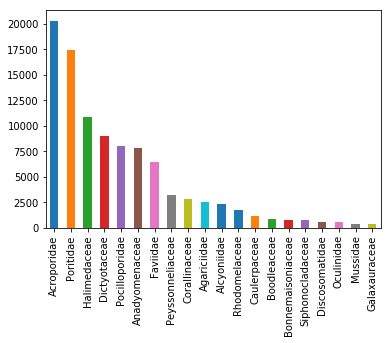

In [236]:
df['FAMILY'].value_counts().head(20).plot(kind = 'bar')


In [13]:
print (df['ISLAND'].unique())
print ("Number of Islands:", df['ISLAND'].nunique())

['Guam' 'Santa Rosa' 'Wake' 'Hawaii' 'Kauai' 'Kaula' 'Lanai' 'Lehua'
 'Maui' 'Molokai' 'Niihau' 'Oahu' 'French Frigate' 'Kure' 'Laysan'
 'Lisianski' 'Maro' 'Midway' 'Necker' 'Pearl & Hermes' 'Baker' 'Howland'
 'Jarvis' 'Johnston' 'Kingman' 'Palmyra' 'Ofu & Olosega' 'Rose' 'Swains'
 'Tau' 'Tutuila' 'Agrihan' 'Aguijan' 'Alamagan' 'Asuncion'
 'Farallon de Pajaros' 'Guguan' 'Maug' 'Pagan' 'Rota' 'Saipan' 'Sarigan'
 'Tinian']
Number of Islands: 43


In [67]:
print (df['REEF_ZONE'].nunique())
print (df['REEF_ZONE'].unique())

4
['Forereef' 'Lagoon' 'Protected Slope' 'Backreef']


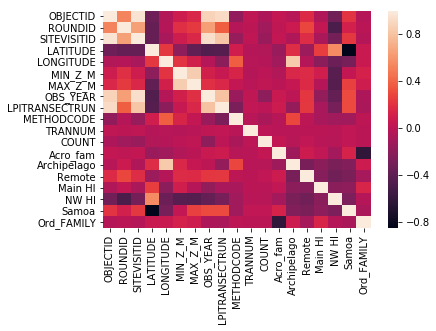

In [238]:
sns.heatmap(df.corr())

In [239]:
print (df['LATITUDE'].nunique())
print (df['LONGITUDE'].nunique())

962
963


In [107]:
#df.sort_values(by=['OBS_YEAR', 'FAMILY'], ascending=True)

In [82]:
df['ISLAND'].unique()


array(['Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian'], dtype=object)

In [29]:
df = pd.concat([df, df['ISLAND'].str.get_dummies(sep=',')], axis=1)

In [65]:
df = pd.concat([df, df['REEF_ZONE'].str.get_dummies(sep=',')], axis=1)

In [ ]:
#Tiago code to group

df.groupby[x for x in df.columns if x != 'COUNT']



In [89]:
data = df[['LATITUDE', 
           'LONGITUDE', 
           'MIN_Z_M', 
           'MAX_Z_M', 
           'OBS_YEAR', 
           'LPITRANSECTRUN', 
           'TRANNUM', 
           'Acro_fam', 
           'Archipelago', 
           'Remote', 
           'Main HI', 
           'NW HI', 
           'Samoa', 
           'Guam', 'Santa Rosa', 'Wake', 'Hawaii', 'Kauai', 'Kaula', 'Lanai',
       'Lehua', 'Maui', 'Molokai', 'Niihau', 'Oahu', 'French Frigate',
       'Kure', 'Laysan', 'Lisianski', 'Maro', 'Midway', 'Necker',
       'Pearl & Hermes', 'Baker', 'Howland', 'Jarvis', 'Johnston',
       'Kingman', 'Palmyra', 'Ofu & Olosega', 'Rose', 'Swains', 'Tau',
       'Tutuila', 'Agrihan', 'Aguijan', 'Alamagan', 'Asuncion',
       'Farallon de Pajaros', 'Guguan', 'Maug', 'Pagan', 'Rota', 'Saipan',
       'Sarigan', 'Tinian',
           'Forereef', 'Lagoon', 'Protected Slope', 'Backreef'
          ]]
target = df['COUNT']


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [71]:
bnb = BernoulliNB() 
lr=LogisticRegression(C=1e9)

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=.3, random_state = 20)
print(lr.fit(data,target))
print('Log Regression:', lr.fit(x_train, y_train).score(x_test, y_test))
print(bnb.fit(data, target))
print('BNB Regression:', bnb.fit(x_train, y_train).score(x_test, y_test))

C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\harr1\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Log Regression: 0.9784370946822308
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
BNB Regression: 0.9784046692607004


In [72]:
regr = linear_model.LinearRegression()
regr.fit(data, target)
print (regr.coef_)
print (regr.intercept_)
print (regr.fit(x_train, y_train).score(x_test, y_test))
print (regr.score(data, target))


[-9.66887730e-02  2.65934393e-02 -5.97238358e-03  5.86985594e-03
 -4.32609253e-01  1.84476177e-04  5.51569195e-03  5.61648542e-02
 -5.48367251e+00  2.51959065e-01  2.44825744e+00  3.09403145e+00
 -3.10575446e-01 -6.14046205e-01 -1.07761216e+00 -6.59793044e+00
 -3.12910497e-01 -5.10133850e-02  3.44624432e+00 -2.21230484e-01
  2.14885362e-01 -2.22878088e-01 -1.81479367e-01 -6.77637560e-02
 -1.55596662e-01 -3.05439724e-01  4.76509517e-01  2.40228010e-01
  1.51434615e-02  3.41430291e-01  5.92356796e-01  1.44811321e+00
  2.85689885e-01  9.57180321e-01  9.64486116e-01  4.48264517e-01
  2.38228932e+00  1.08032063e+00  1.01734861e+00 -1.88672614e-01
 -1.50953725e-01  3.37138236e-01 -1.99298635e-01 -1.08788708e-01
 -2.00393880e-01 -5.61481160e-01 -3.71410712e-01 -9.36324667e-02
 -2.03575571e-03 -3.84683618e-01 -5.16139080e-02 -2.59985838e-01
 -4.91288621e-01 -4.89098215e-01 -3.49233817e-01 -5.37156152e-01
  6.09649489e-02  4.57524784e-02 -1.49894033e-01  4.31766061e-02]
873.3963481423943
0.1214

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=5)

array([0.1241286 , 0.00727536, 0.        , 0.        , 0.        ])

In [62]:
ridgeregr = linear_model.Ridge(alpha = 10, fit_intercept = False)
ridgeregr.fit(x_train, y_train)
print (ridgeregr.fit(x_train, y_train).score(x_test, y_test))
print (cross_val_score(ridgeregr, data, target, cv = 5))



0.007576355206586283
[-0.02621683 -0.01243399  0.          0.          0.        ]


## Seems like Log and BNB regressions perform really well and linear regression and ridge regressions consistently perform poorly.

In [50]:
from buoyant import Buoy

Guam = Buoy(52200)
Guam.sea_water_temperature
Guam.sea_water_temperature.datetime

datetime.datetime(2019, 4, 23, 15, 30, tzinfo=<UTC>)

In [21]:
from NDBC import Station
from datetime import datetime

ImportError: cannot import name 'Station' from 'NDBC' (C:\Users\harr1\Anaconda3\lib\site-packages\NDBC\__init__.py)